<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Big_Data_%EB%B6%84%EC%84%9D_%EC%9D%BC%EC%9D%BC_%EA%B3%BC%EC%A0%9C%EB%AC%BC_%EA%B7%B8%EB%9E%98%EB%94%94%EC%96%B8%ED%8A%B8_%EB%B6%80%EC%8A%A4%ED%8C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data 분석 일일 과제물 - 그래디언트 부스팅

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

### **데이터 구성하기**

In [4]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/Concrete.csv')

print(df_raw.shape)
df_raw.head()

(1030, 9)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
df_raw_x = df_raw.drop('strength',axis = 1)
df_raw_y = df_raw['strength']

In [11]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, 
                                                                df_raw_y, 
                                                                test_size = 0.4, 
                                                                random_state = 1234)

print('df_train_x size : {}'.format(df_train_x.shape))
print('df_test_x size : {}'.format(df_test_x.shape))
print('df_train_y size : {}'.format(df_train_y.shape))
print('df_test_y size : {}'.format(df_test_y.shape))

df_train_x size : (721, 8)
df_test_x size : (309, 8)
df_train_y size : (721,)
df_test_y size : (309,)


### **모델 생성**

In [12]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.947
Score on test set : 0.913


train과 test 데이터에 대한 모델 설명력은 각각 94.7%, 91.3%이다. 모델의 설명력은 강하며, 일반화 또한 가능하다고 볼 수 있다.

### **모델 파라미터 설정 : n_estimators**

In [38]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingRegressor(random_state = 1234, 
                                   n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [39]:
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.642,0.631
1,20,0.807,0.784
2,30,0.869,0.842
3,40,0.898,0.869
4,50,0.914,0.881
5,60,0.926,0.892
6,70,0.933,0.901
7,80,0.939,0.905
8,90,0.943,0.909
9,100,0.947,0.913


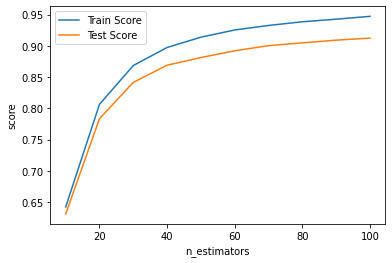

In [40]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

- 트리의 개수가 증가하면서 모델의 설명력이 지속적으로 증가하고 있다.
- 90% 정도의 모델 설명력을 확보하기 위해 **n_estimators = 80**으로 설정한다.

### **모델 파라미터 설정 : min_samples_leaf**

In [44]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_n_estimators in para_leaf :
    gb = GradientBoostingRegressor(random_state = 1234, 
                                   n_estimators = 80, 
                                   min_samples_leaf = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [45]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.939,0.905
1,2,0.938,0.906
2,3,0.936,0.907
3,4,0.935,0.905
4,5,0.934,0.905
5,6,0.935,0.907
6,7,0.934,0.908
7,8,0.933,0.911
8,9,0.934,0.909
9,10,0.932,0.908


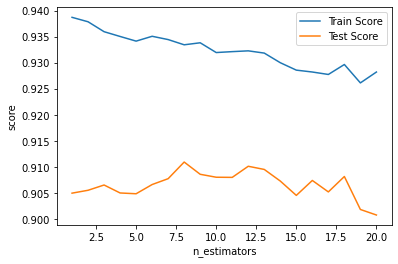

In [46]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델의 성능은 오히려 떨어진다.
- TestScore의 변화가 크게 없기 때문에 TrainScore이 0.938의 양호한 성적을 보여주는 **min_samples_leaf = 2**로 설정한다.

### **모델 파라미터 설정 : min_samples_split**

In [48]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split :
    gb = GradientBoostingRegressor(random_state = 1234, 
                                   n_estimators = 80, 
                                   min_samples_leaf = 2, 
                                   min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [49]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.938,0.906
1,4,0.938,0.906
2,6,0.937,0.906
3,8,0.938,0.906
4,10,0.938,0.907
5,12,0.937,0.907
6,14,0.938,0.908
7,16,0.936,0.908
8,18,0.937,0.908
9,20,0.937,0.908


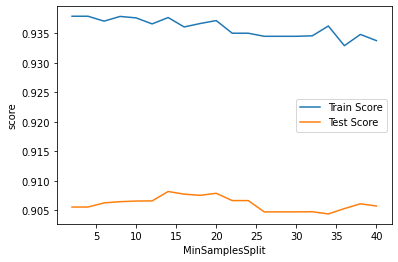

In [50]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 자료 수가 증가할수록 모델의 성능에 변화가 없거나 소폭 감소한다.
- TestScore의 변화가 크게 없기 때문에 TrainScore이 0.908의 양호한 성적을 보여주는 **min_samples_split = 14**로 설정한다.

### **모델 파라미터 설정 : max_depth**

In [54]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,21)]

for v_max_depth in para_depth :
    gb = GradientBoostingRegressor(random_state = 1234, 
                                   n_estimators = 80, 
                                   min_samples_leaf = 2, 
                                   min_samples_split = 14, 
                                   max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [56]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.793,0.785
1,2,0.897,0.872
2,3,0.938,0.908
3,4,0.964,0.915
4,5,0.981,0.920
5,6,0.989,0.919
6,7,0.992,0.921
7,8,0.994,0.920
8,9,0.995,0.919
9,10,0.995,0.919


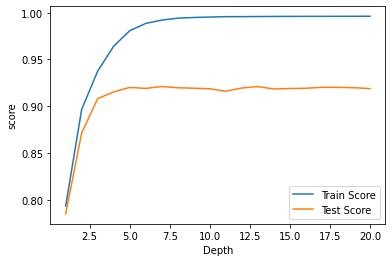

In [57]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('Depth')
plt.legend()

- 최대 깊이가 증가할수록 모델의 성능이 증가하다가 일정 수준 이후로는 변화가 없다.
- 과대적합을 막기 위해 높은 성적을 보여주는 파라미터는 제외하고, 양호한 TrainScore을 보여주는 **max_depth = 3**으로 설정한다.

### **모델 파라미터 설정 : learning_rate**

In [58]:
train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingRegressor(random_state = 1234, 
                                   n_estimators = 80, 
                                   min_samples_leaf = 2, 
                                   min_samples_split = 14, 
                                   max_depth = 3,
                                   learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [59]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.938,0.908
1,0.2,0.963,0.926
2,0.3,0.974,0.929
3,0.4,0.979,0.933
4,0.5,0.981,0.917
5,0.6,0.982,0.924
6,0.7,0.983,0.899
7,0.8,0.985,0.926
8,0.9,0.985,0.894


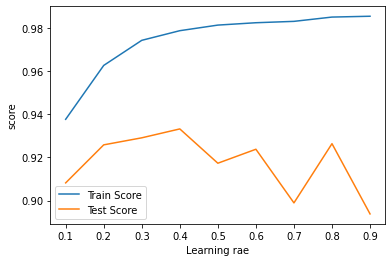

In [60]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('Learning rae')
plt.legend()

- 최대 깊이가 증가할수록 모델의 성능이 증가하다가 일정 수준 이후로 성능이 오히려 약화된다.
- TestScore이 0.933이고 TrainScore이 0.979를 보여주는 **learning_rate = 0.4**으로 설정한다.

### **결론 도출 : 최종 모델 생성**

In [63]:
gb_final = GradientBoostingRegressor(random_state = 1234,
                                     n_estimators = 80,
                                     min_samples_leaf = 2,
                                     min_samples_split = 14,
                                     max_depth = 3,
                                     learning_rate = 0.4)
gb_final.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.979
Score on test set: 0.933


- train과 test 데이터에 대한 모델의 설명력은 각각 97.9%, 93.3%이다.
- 파라미터 조정 전 train과 test 데이터에 대해 94.7%, 91.3%의 설명력이 나온 것에 비하면 파라미터 조정이 효과가 있었던 것으로 해석된다.